In [ ]:
# import all revelant libraries
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
import numpy as np
import random
from keras.datasets.mnist import load_data
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import clear_output
from PIL import Image
import os
from google.colab import drive
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import tensorflow as tf
from __future__ import print_function
from keras import backend as K

In [ ]:
# remove the .ipynb_checkpoints which are problematic
!rmdir /content/train/.ipynb_checkpoints
!rmdir /content/test/.ipynb_checkpoints

rmdir: failed to remove '/content/train/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/test/.ipynb_checkpoints': No such file or directory


In [ ]:
# specify number or training and testing images
num_train_images = 1195+239
num_test_images = 60

# sigmoid and inverse sigmoid functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def inv_sigmoid(x):
    return np.log(x/(1-x))

# setting up the image access pipeline
train_path = '/content/train'
test_path = '/content/test'
os.getcwd()

img_list_train = os.listdir(train_path)
img_list_test = os.listdir(test_path)

# image processing function:
# opens each image, resizes it, labels it based on specification
def prepare_images(img_list,path,length, specification):
    pixels = []
    imgs = []
    labels = []
    for i in range(length):
        img = Image.open(path+'/'+img_list[i])
        basewidth = 100
        img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
        pix = np.array(img.getdata())
        pixels.append(pix.reshape(100,100,3))
        imgs.append(img)
        if specification == "species":
          if img_list[i].split('_')[0] == "cardinal":
            labels.append(0)
          elif img_list[i].split('_')[0] == "pelican":
            labels.append(1)
          elif img_list[i].split('_')[0] == "eagle":
            labels.append(2)
          elif img_list[i].split('_')[0] == "owl":
            labels.append(3)
          elif img_list[i].split('_')[0] == "sparrow":
            labels.append(4)
          elif img_list[i].split('_')[0] == "parrot":
            labels.append(5)
          else:
            labels.append("none")
        elif specification == "feather_color":
          if img_list[i].split('_')[1] == "red":
            labels.append(0)
          elif img_list[i].split('_')[1] == "white":
            labels.append(1)
          elif img_list[i].split('_')[1] == "brown":
            labels.append(2)
          elif img_list[i].split('_')[1] == "gray":
            labels.append(3)
          elif img_list[i].split('_')[1] == "blue":
            labels.append(4)
          elif img_list[i].split('_')[1] == "black":
            labels.append(5)
          elif img_list[i].split('_')[1] == "green":
            labels.append(6)
          else:
            labels.append("none")
        elif specification == "beak_color":
          if img_list[i].split('_')[2] == "red":
            labels.append(0)
          elif img_list[i].split('_')[2] == "yellow":
            labels.append(1)
          elif img_list[i].split('_')[2] == "gray":
            labels.append(2)
          elif img_list[i].split('_')[2] == "black":
            labels.append(3)
          elif img_list[i].split('_')[2] == "white":
            labels.append(4)
          else:
            labels.append("none")
    return np.array(pixels),imgs,np.array(labels)

# processing the training and testing images
species_train_pixels,species_train_imgs,species_train_labels = prepare_images(img_list_train,train_path,num_train_images, "species")
species_test_pixels,species_test_imgs,species_test_labels = prepare_images(img_list_test,test_path,num_test_images, "species")

feather_color_train_pixels,feather_color_train_imgs,feather_color_train_labels = prepare_images(img_list_train,train_path,num_train_images, "feather_color")
feather_color_test_pixels,feather_color_test_imgs,feather_color_test_labels = prepare_images(img_list_test,test_path,num_test_images, "feather_color")

beak_color_train_pixels,beak_color_train_imgs,beak_color_train_labels = prepare_images(img_list_train,train_path,num_train_images, "beak_color")
beak_color_test_pixels,beak_color_test_imgs,beak_color_test_labels = prepare_images(img_list_test,test_path,num_test_images, "beak_color")

#verifying that the training labels look accurate
print(len(species_train_labels))

1434


[Errno 2] No such file or directory: 'content'
/content/train
[Errno 2] No such file or directory: 'train'
/content/train


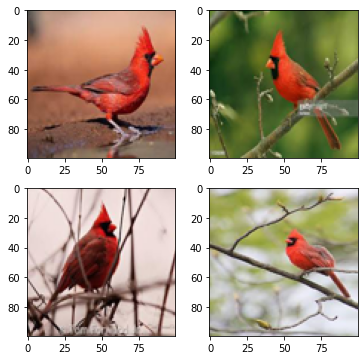

In [ ]:
# change directories
%cd content
%cd train

# specify number of rows and columns for sample image viewing
rows = 2
cols = 2

# specify number of possible images to choose from
num_imgs = rows*cols
num_cardinal_imgs = 240

possible_images = []
display_images = []

def display_cardinal_images():
  # adding all the possible image numbers
  for i in range(1, num_cardinal_imgs+1):
    possible_images.append(i)

  # generating four random images to display
  rand1 = random.randint(0, num_cardinal_imgs)
  display_images.append(rand1)
  possible_images.remove(rand1)
  
  rand2 = random.randint(0, num_cardinal_imgs)
  display_images.append(rand2)
  possible_images.remove(rand2)
  
  rand3 = random.randint(0, num_cardinal_imgs)
  display_images.append(rand3)
  possible_images.remove(rand3)
  
  rand4 = random.randint(0, num_cardinal_imgs)
  display_images.append(rand4)
  possible_images.remove(rand4)

# creating the list which specifies the images to display
display_cardinal_images()

# function to reshape the images to the format in which they are fed into the model
def img_reshape(img):
    img = Image.open('cardinal_red_red_'+str(img)+'.jpeg')
    img = img.resize((100,100))
    img = np.asarray(img)
    return img

# adding the images to display to a list
img_array = []
for image in display_images:
  img_array.append(img_reshape(image))

img_count = 0

# creating the plot
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(6,6))

# displaying the images
for i in range(rows):
    for j in range(cols):        
        if img_count < int(num_imgs+1):
            axes[i, j].imshow(img_array[img_count])
            img_count+=1

In [ ]:
# defining the model
def define_model(specification):
  model = Sequential()
  model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
  model.add(MaxPool2D(pool_size=(1,1)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  if specification == "species":
    model.add(Dense(6, activation='softmax'))
  elif specification == "feather_color":
    model.add(Dense(7, activation='softmax'))
  elif specification == "beak_color":
    model.add(Dense(5, activation='softmax'))
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  return model

In [ ]:
# training the model
species_model = define_model("species")
species_history = species_model.fit(species_train_pixels, species_train_labels, batch_size=10, epochs=10, validation_data=(species_test_pixels, species_test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


144/144 [==============================] - 30s 205ms/step - loss: 475.3973 - accuracy: 0.3285 - val_loss: 16.2928 - val_accuracy: 0.3667
Epoch 2/10
144/144 [==============================] - 32s 221ms/step - loss: 4.6455 - accuracy: 0.7517 - val_loss: 10.2143 - val_accuracy: 0.4500
Epoch 3/10
144/144 [==============================] - 30s 205ms/step - loss: 0.7268 - accuracy: 0.9512 - val_loss: 10.2267 - val_accuracy: 0.4500
Epoch 4/10
144/144 [==============================] - 30s 206ms/step - loss: 0.5808 - accuracy: 0.9721 - val_loss: 12.3817 - val_accuracy: 0.4000
Epoch 5/10
144/144 [==============================] - 30s 206ms/step - loss: 0.5380 - accuracy: 0.9665 - val_loss: 12.3380 - val_accuracy: 0.3667
Epoch 6/10
144/144 [==============================] - 29s 204ms/step - loss: 0.1101 - accuracy: 0.9895 - val_loss: 11.0967 - val_accuracy: 0.3667
Epoch 7/10
144/144 [==============================] - 30s 206ms/step - loss: 0.0194 - accuracy: 0.9972 - val_loss: 11.7994 - val_accu

In [ ]:
# training the model
feather_color_model = define_model("feather_color")
feather_color_history = feather_color_model.fit(species_train_pixels, species_train_labels, batch_size=10, epochs=10, validation_data=(species_test_pixels, species_test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


144/144 [==============================] - 31s 208ms/step - loss: 420.5537 - accuracy: 0.2810 - val_loss: 4.9130 - val_accuracy: 0.4500
Epoch 2/10
144/144 [==============================] - 35s 241ms/step - loss: 1.7284 - accuracy: 0.7755 - val_loss: 4.3007 - val_accuracy: 0.4667
Epoch 3/10
144/144 [==============================] - 32s 219ms/step - loss: 0.5310 - accuracy: 0.9421 - val_loss: 5.7601 - val_accuracy: 0.5000
Epoch 4/10
144/144 [==============================] - 35s 246ms/step - loss: 0.1566 - accuracy: 0.9770 - val_loss: 4.4075 - val_accuracy: 0.4167
Epoch 5/10
144/144 [==============================] - 33s 225ms/step - loss: 0.1031 - accuracy: 0.9895 - val_loss: 4.9853 - val_accuracy: 0.3667
Epoch 6/10
144/144 [==============================] - 33s 225ms/step - loss: 0.2430 - accuracy: 0.9798 - val_loss: 4.4715 - val_accuracy: 0.4667
Epoch 7/10
144/144 [==============================] - 33s 227ms/step - loss: 0.0344 - accuracy: 0.9951 - val_loss: 4.1377 - val_accuracy: 0

In [ ]:
# training the model
beak_color_model = define_model("beak_color")
beak_color_history = beak_color_model.fit(beak_color_train_pixels, beak_color_train_labels, batch_size=10, epochs=10, validation_data=(beak_color_test_pixels, beak_color_test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


144/144 [==============================] - 30s 204ms/step - loss: 536.3228 - accuracy: 0.3536 - val_loss: 5.6542 - val_accuracy: 0.3667
Epoch 2/10
144/144 [==============================] - 30s 205ms/step - loss: 2.8994 - accuracy: 0.7601 - val_loss: 5.4741 - val_accuracy: 0.5167
Epoch 3/10
144/144 [==============================] - 29s 204ms/step - loss: 0.8121 - accuracy: 0.9268 - val_loss: 7.0220 - val_accuracy: 0.4333
Epoch 4/10
144/144 [==============================] - 29s 205ms/step - loss: 0.4107 - accuracy: 0.9805 - val_loss: 6.6174 - val_accuracy: 0.4333
Epoch 5/10
144/144 [==============================] - 30s 209ms/step - loss: 0.2256 - accuracy: 0.9819 - val_loss: 4.5506 - val_accuracy: 0.5167
Epoch 6/10
144/144 [==============================] - 32s 225ms/step - loss: 0.5489 - accuracy: 0.9770 - val_loss: 6.5519 - val_accuracy: 0.4667
Epoch 7/10
144/144 [==============================] - 30s 208ms/step - loss: 0.1437 - accuracy: 0.9909 - val_loss: 6.8835 - val_accuracy: 0

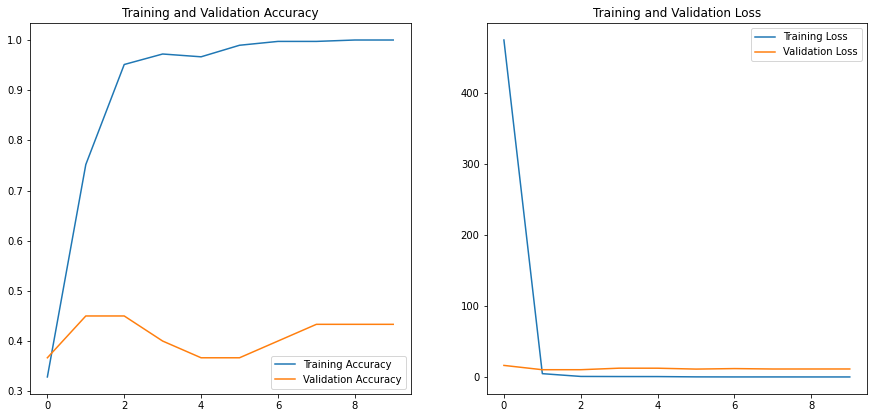

In [ ]:
# creating accuracy and loss graphs
acc = species_history.history['accuracy']
val_acc = species_history.history['val_accuracy']
loss = species_history.history['loss']
val_loss = species_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

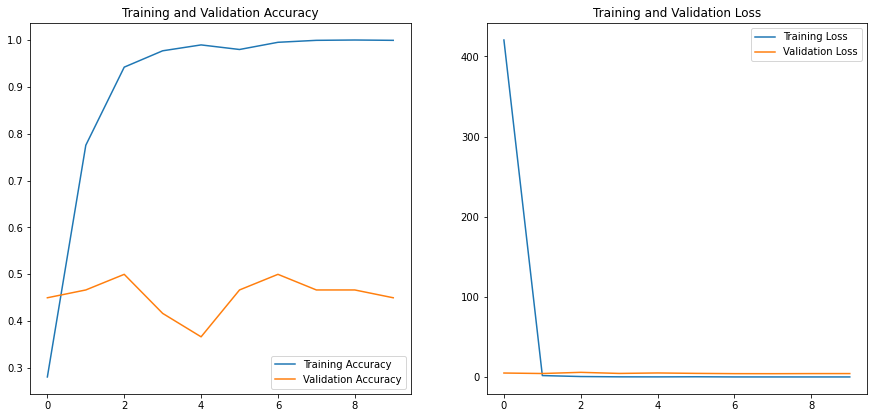

In [ ]:
# creating accuracy and loss graphs
acc = feather_color_history.history['accuracy']
val_acc = feather_color_history.history['val_accuracy']
loss = feather_color_history.history['loss']
val_loss = feather_color_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

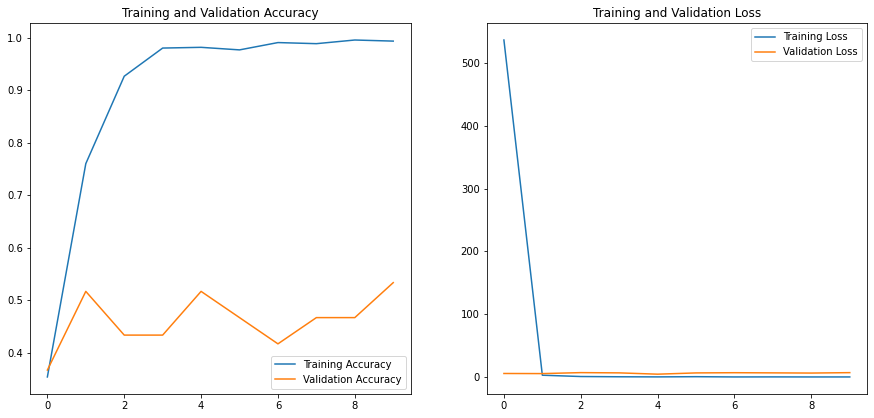

In [ ]:
# creating accuracy and loss graphs
acc = beak_color_history.history['accuracy']
val_acc = beak_color_history.history['val_accuracy']
loss = beak_color_history.history['loss']
val_loss = beak_color_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

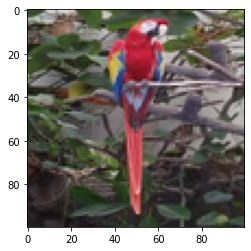

[1.1729664e-27 2.5510891e-36 1.9370765e-20 3.2570653e-33 8.6576735e-25
 1.0000000e+00]
parrot_red_white_63.jpeg


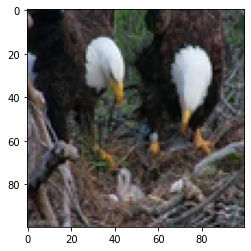

[4.9603408e-11 9.9997473e-01 1.8105581e-11 2.5249030e-05 2.4232661e-11
 2.3045139e-17]
eagle_black_yellow_244.jpeg


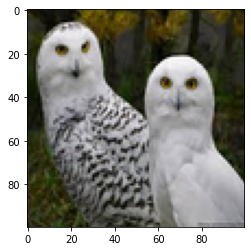

[5.5487173e-28 4.1423568e-22 5.6982180e-24 1.0000000e+00 2.9006870e-14
 2.0966374e-35]
owl_white_gray_143.jpeg


In [ ]:
testarray = np.array(species_test_pixels)
prediction = species_model.predict(testarray)

def show_prediction(img_num):
  testarray = np.array([species_test_pixels[img_num]])
  prediction = species_model.predict(testarray)
  plt.figure()
  plt.imshow(species_train_pixels[img_num])
  plt.show()
  if (prediction[0])[0] > 0.9:
    print("Image is a cardinal!")
  elif (prediction[0])[1] > 0.9:
    print("Image is an pelican!")
  elif (prediction[0])[2] > 0.9:
    print("Image is an eagle!")
  elif (prediction[0])[3] > 0.9:
    print("Image is an owl!")
  else:
    print("Model not confident")

def compare_predictions(num_to_show):
  for i in range(0, num_to_show-1):
    plt.figure()
    plt.imshow(species_test_pixels[i])
    plt.show()
    print(prediction[i])
    print(img_list_test[i])

compare_predictions(4)

In [ ]:
# importing relevant libraries to deploy model in an Anvil webapp
!pip install anvil-uplink
import anvil.server
anvil.server.connect("UABC7HDZSMHPEUQZFQEFDDXQ-M67RAFW6N6NY77N2")
import cv2
import io
import anvil.media
import PIL

# the function that is called when an image is uploaded using Anvil:
# resizes the image, feeds it through the model, if output probability is > 90%, will classify image
@anvil.server.callable
def classify_image(file):
  pixels = []
  with anvil.media.TempFile(file) as filename:
    img = Image.open(filename)
  basewidth = 100
  img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
  pix = np.array(img.getdata())
  pixels.append(pix.reshape(100,100,3))
  image = np.array(pixels)
  #return (1, image.shape)

  species_prediction = species_model.predict(image)
  feather_color_prediction = feather_color_model.predict(image)
  beak_color_prediction = beak_color_model.predict(image)

  to_return = []

  if (species_prediction[0])[0] > 0.9:
    to_return.append("Certainty: " + str((species_prediction[0])[0]*100) + "%")
    to_return.append("Species: cardinal")
  elif (species_prediction[0])[1] > 0.9:
    to_return.append("Certainty: " + str((species_prediction[0])[1]*100) + "%")
    to_return.append("Species: pelican")
  elif (species_prediction[0])[2] > 0.9:
    to_return.append("Certainty: " + str((species_prediction[0])[2]*100) + "%")
    to_return.append("Species: eagle")
  elif (species_prediction[0])[3] > 0.9:
    to_return.append("Certainty: " + str((species_prediction[0])[3]*100) + "%")
    to_return.append("Species: owl")
  elif (species_prediction[0])[4] > 0.9:
    to_return.append("Certainty: " + str((species_prediction[0])[4]*100) + "%")
    to_return.append("Species: sparrow")
  elif (species_prediction[0])[5] > 0.9:
    to_return.append("Certainty: " + str((species_prediction[0])[5]*100) + "%")
    to_return.append("Species: parrot")
  else:
    to_return.append("N/A")
    to_return.append("Model not confident")
  
  if (feather_color_prediction[0])[0] > 0.9:
    to_return.append("Certainty: " + str((feather_color_prediction[0])[0]*100) + "%"), 
    to_return.append("Feather color: red")
  elif (feather_color_prediction[0])[1] > 0.9:
    to_return.append("Certainty: " + str((feather_color_prediction[0])[1]*100) + "%"), 
    to_return.append("Feather color: white")
  elif (feather_color_prediction[0])[2] > 0.9:
    to_return.append("Certainty: " + str((feather_color_prediction[0])[2]*100) + "%"), 
    to_return.append("Feather color: brown")
  elif (feather_color_prediction[0])[3] > 0.9:
    to_return.append("Certainty: " + str((feather_color_prediction[0])[3]*100) + "%"), 
    to_return.append("Feather color: gray")
  elif (feather_color_prediction[0])[4] > 0.9:
    to_return.append("Certainty: " + str((feather_color_prediction[0])[4]*100) + "%"), 
    to_return.append("Feather color: blue")
  elif (feather_color_prediction[0])[5] > 0.9:
    to_return.append("Certainty: " + str((feather_color_prediction[0])[5]*100) + "%"), 
    to_return.append("Feather color: black")
  elif (feather_color_prediction[0])[6] > 0.9:
    to_return.append("Certainty: " + str((feather_color_prediction[0])[5]*100) + "%"), 
    to_return.append("Feather color: green")
  else:
    to_return.append("N/A")
    to_return.append("Model not confident")

  if (beak_color_prediction[0])[0] > 0.9:
    to_return.append("Certainty: " + str((beak_color_prediction[0])[0]*100) + "%")
    to_return.append("Beak color: red")
  elif (beak_color_prediction[0])[1] > 0.9:
    to_return.append("Certainty: " + str((beak_color_prediction[0])[1]*100) + "%")
    to_return.append("Beak color: yellow")
  elif (beak_color_prediction[0])[2] > 0.9:
    to_return.append("Certainty: " + str((beak_color_prediction[0])[2]*100) + "%")
    to_return.append("Beak color: gray")
  elif (beak_color_prediction[0])[3] > 0.9:
    to_return.append("Certainty: " + str((beak_color_prediction[0])[3]*100) + "%")
    to_return.append("Beak color: black")
  elif (beak_color_prediction[0])[4] > 0.9:
    to_return.append("Certainty: " + str((beak_color_prediction[0])[4]*100) + "%")
    to_return.append("Beak color: white")
  else:
    to_return.append("N/A")
    to_return.append("Model not confident")

  return(to_return[0],to_return[1],to_return[2],to_return[3],to_return[4],to_return[5])  
  anvil.server.wait_forever()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


Disconnecting from previous connection first...
Connecting to wss://anvil.works/uplink
Anvil websocket closed (code 1000, reason=b'')
Anvil websocket open
Connected to "Default environment" as SERVER
